
# Filtros espaciales

En esta práctica vamos a implementar varios ejemplos de filtros espaciales. Propondremos varias opciones de programación y analizaremos las ventajas/desventajas en tiempo de ejecución



In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Ejercicio 1

Realizar una función en Python + opencv que implemente el filtro de la media aritmética de tamaño 3x3. El programa recibirá como parámetro de entrada únicamente una imagen y deberá devolver una imagen del mismo tamaño. 
- Versión 1: Puedes utilizar dos bucles for anidados para recorrer las filas/columnas de la matriz. Recuerda que no es necesario que utilicemos otros dos bucles for para calcular la media de los 9 valores, ya que existe la función mean, que calcula la media aritmética de un vector/matriz.
- Versión 2: Modifica la versión anterior para incorporar un nuevo parámetro de entrada, que determine el tamaño de la ventana para realizar la media aritmética. Si, por ejemplo, el segundo parámetro es igual a 3, realizará la misma operación que la versión 1. Si, por el contrario, el segundo parámetro  es igual a 5, entonces realizará la media aritmética en una ventana de 5x5.

Tal y como hemos visto en clase, si no queremos perder un número importante de filas y columnas en nuestra imagen debemos crear nuevas filas/columnas ficticias antes de empezar a pasar el filtro. Para ello podemos utilizar la función cv2.copyMakeBorder. Por ejemplo, en el caso de la versión 1, necesitamos añadir una nueva fila/columna al principio/final de la imagen. Para ello podemos escribir

imagen_ampliada = cv2.copyMakeBorder(imagen, 1, 1, 1, 1, cv2.BORDER_REPLICATE)

Recuerda que existen varias formas para crear estas filsa/columnas artificiales, pero en este notebook utilizaremos principalmente BORDER_REPLICATE

In [10]:
def filtro_media_v1(imagen):
    imagen_ampliada = cv2.copyMakeBorder(imagen, 1, 1, 1, 1, cv2.BORDER_REPLICATE)
    imagen_filtro = np.zeros_like(imagen_ampliada)

    for i in range(1, imagen_ampliada.shape[0]-1):
        for j in range(1, imagen_ampliada.shape[1]-1):
            ventana = imagen_ampliada[i-1:i+2, j-1:j+2]
            imagen_filtro[i-1,j-1] = np.mean(ventana).astype(np.uint8)
            
    return imagen_filtro

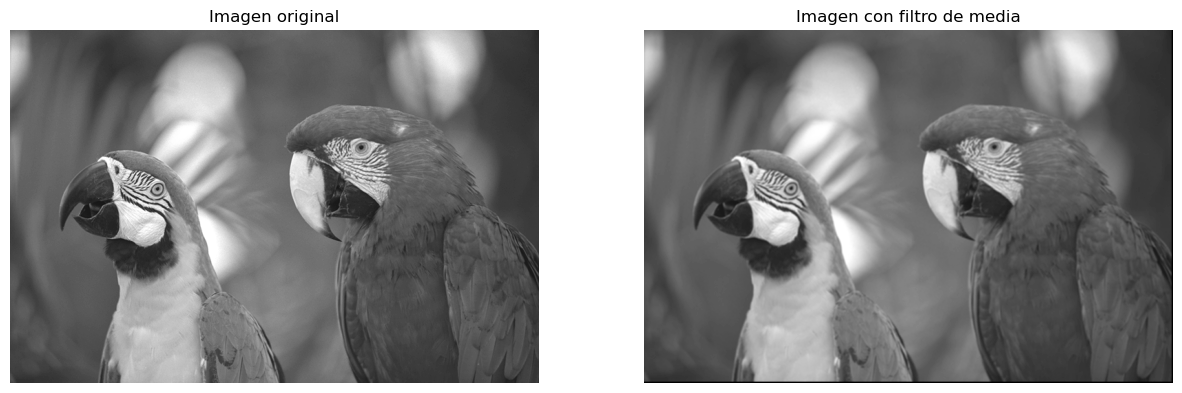

In [14]:
imagen = cv2.imread('images/birds.png', cv2.IMREAD_GRAYSCALE)

imagen2 = filtro_media_v1(imagen)

fig, axes = plt.subplots(1,2,figsize=(15,5))

axes[0].imshow(imagen, cmap='gray', vmin=0, vmax=255)
axes[1].imshow(imagen2, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Imagen original')
axes[1].set_title('Imagen con filtro de media')
axes[0].axis('off')
axes[1].axis('off')
plt.show()


In [15]:
def filtro_media_v2(imagen, n):
    imagen_ampliada = cv2.copyMakeBorder(imagen, n//2, n//2, n//2, n//2, cv2.BORDER_REPLICATE)
    imagen_filtro = np.zeros_like(imagen_ampliada)
    
    for i in range(n//2, imagen_ampliada.shape[0]-n//2):
        for j in range(n//2, imagen_ampliada.shape[1]-n//2):
            ventana = imagen_ampliada[i-n//2:i+n//2+1, j-n//2:j+n//2+1]
            imagen_filtro[i,j] = np.mean(ventana).astype(np.uint8)
    
    return imagen_filtro

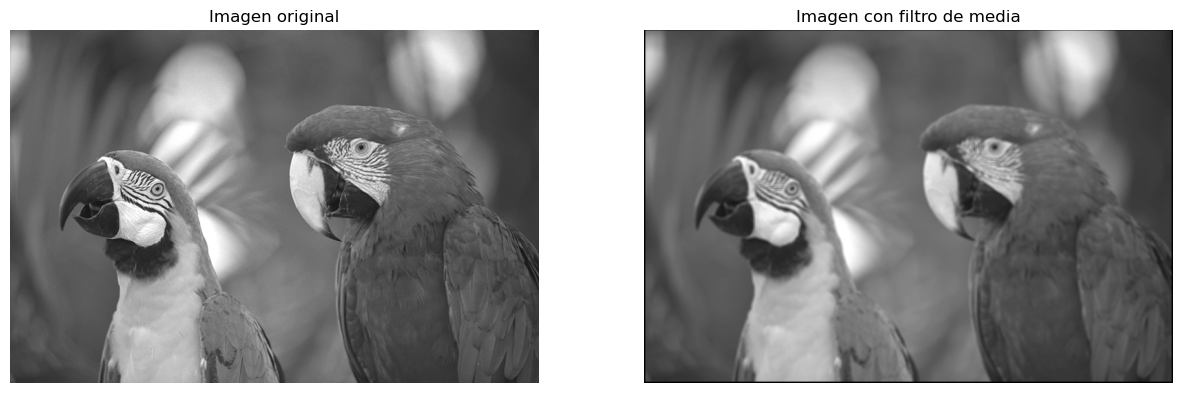

In [16]:
imagen = cv2.imread('images/birds.png', cv2.IMREAD_GRAYSCALE)

imagen2 = filtro_media_v2(imagen, 5)

fig, axes = plt.subplots(1,2,figsize=(15,5))

axes[0].imshow(imagen, cmap='gray', vmin=0, vmax=255)
axes[1].imshow(imagen2, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Imagen original')
axes[1].set_title('Imagen con filtro de media')
axes[0].axis('off')
axes[1].axis('off')
plt.show()

### Ejercicio 2

Realizar una función en Python + OpenCV que implemente un filtro lineal cualquiera. En este caso, el programa recibe 2 parámetros de entrada: la imagen y una máscara de coeficientes (máscara de filtrado) H. Dicha máscara podrá ser de cualquier tamaño (recuerda que, en general, son de tamaño mxn,m=2a+1,n=2b+1.


In [ ]:
def filtro_espacial(imagen, H):
    
    return 

In [ ]:
imagen = 

Revisa la presentación de teoría correspondiente al Tema 2.2 y busca una máscara 3x3 correspondiente a un filtro lineal de media ponderada. Ejecuta el filtro sobre alguna de las imágenes con ruido gaussiano. Comprueba si la utilización de filtros de suavizado ayuda a atenuar el nivel de ruido.

### Ejercicio 3

Vamos a realizar una modificación del programa anterior cambiando la metodología de programación. Para ello, echa un ojo a la función im_to_col escrita en Python. Básicamente, la función im_to_col transforma la imagen en nueva matriz con muy pocas filas y muchas columnas:cada bloque $m\times n$ de píxeles de la imagen original es transformado a un vector columna y es concatenado columna a columna para formar la matriz resultado. 

Crea un filtro_espacial_v2 que llame a im_to_col y realice el filtro espacial utilizando la matriz proporcionada por im_to_col.

In [ ]:
def im_to_col(imagen, m, n):
    filas, columnas = imagen.shape
    a = m//2
    b = n//2
    imagen2 = np.zeros((m*n, filas*columnas))
    imagen = cv2.copyMakeBorder(imagen, a, a, b, b, cv2.BORDER_REPLICATE)
    aux = 0
    for i in range(a, filas+a):
        for j in range(b, columnas+b):
            imagen2[:, aux] = imagen[i-a:i+a+1, j-b:j+b+1].flatten()
            aux += 1
    return imagen2

In [ ]:
def filtro_espacial_v2(imagen, H):
    
    return  

In [ ]:
imagen = 

Una vez programado, comprueba si existe una mejora en tiempo de ejución. Para ello, puedes utilizar los siguientes comandos

In [ ]:
f = np.float32([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16
%timeit imagen2 = filtro_espacial(imagen, f)
%timeit imagen2 = filtro_espacial_v2(imagen, f)

### Ejercicio 4
Realiza un programa que reciba como parámetro de entrada una imagen, un tamaño de ventana (al igual que en la versión 2 del programa 1) y un entero a modo de opción. El programa aplicará un filtro no lineal dependiendo del último parámetro de entrada. Así, aplicará el filtro del mínimo si la opción es 1, el del máximo si la opción es 2, el del punto medio (entre el mínimo y el máximo) si la opción es 3 y el de la mediana si la opción es 4. 




In [ ]:
def filtro_no_lineal(imagen, n, opcion):
    
    return

Comparar el resultado de un filtrado lineal basado en la media aritmética y basado en la mediana para diferentes valores de ventana. ¿Qué diferencias observas conforme aumenta el tamaño de ventana?

### Ejercicio 5

Vamos ahora a experimentar con filtros algo que se salen del estandar habitual. En primer lugar, vamos  a implementar un filtro no homogéneo. Es decir, un filtro en el que por cada pixel aplicamos una matriz de coeficientes H diferente. La matriz de coeficientes estará formada por todo ceros menos un elemento, que tendrá valor 1. La posición de dicho elemento se calculará aleatoriamente en cada una de las iteraciones. Comprueba el resultado de dicho filtro con una tamaño de ventana de 5, 7 o 13, por ejemplo.

In [ ]:
def filtro_no_homogeneo(imagen, n):
    
    return 

In [ ]:
imagen = 

### Ejercicio 6

Ahora vamos a trabajar con un filtro no lineal no homogéneo. En este caso, la no homogeneidad viene por el tamaño de vecindad, que puede ir variando según el pixel en el que trabajamos.

Realizar un programa que reciba como parámetro de entrada una imagen y un tamaño máximo de ventana (por ejemplo, Smax = 9). Por cada píxel de la imagen el programa comprueba si dicho píxel está o no alterado por ruido impulsivo (si es 0 o es 255). Si no lo está, deja el píxel sin procesar y pasa al siguiente. Si el pixel resulta alterado, toma una ventana 3x3 alrededor de él y calcula la mediana de los 9 píxeles. A continuación, comprueba si el valor mediana está o no alterado. Si no lo está, sustituye el valor del píxel por el de la mediana. Si está alterado, se repetirá este mismo proceso aumentando la ventana de píxeles hasta un tamaño que permita encontrar un valor de mediana no alterado (o bien se haya llegado al tamaño máximo de ventana). Una vez que hayamos procesado un píxel, pasaremos al siguiente y repetiremos el proceso desde el principio. Es decir, volveremos a comprobar si está alterado, etc.

Comprueba la eficacia del algoritmo con imágenes alteradas con ruido sal y pimienta. Encontrarás imágenes con diferentes porcentajes de ruido. Comprueba la diferencia entre aplicar este algoritmo y el algoritmo no lineal de la mediana (ejercicio 4). ¿En qué caso obtienen imágenes parecidas? ¿En cuáles no? ¿Y el tiempo de ejecución? 


In [ ]:
def adaptativo(imagen, Smax):
    
    return 

Si quieres generar imágenes propias alteradas por algún tipo de ruido, puedes usar la siguiente función

In [ ]:
from skimage.util import random_noise
imagen_gau = np.uint8(255 * random_noise(imagen, mode='gaussian', var = 0.0015))
imagen_sp = np.uint8(255 * random_noise(imagen, mode= 's&p', amount = 0.1))
